In [8]:
import os, pickle
DATA_DIR = "/home/toto/vscode/uni/code-ingegneria-informatica/dataMining/esercitazioni/DM-Course-23/03 - Classification/data/"

mode = 'rb'
with open(os.path.join(DATA_DIR,'mnist.pickle'), mode) as f:
    mnist = pickle.load(f)


In [16]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier

X, y = mnist["data"].values, mnist["target"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/7, random_state=42 )
y_train_5 = (y_train == 5)

rf = RandomForestClassifier()
y_scores = cross_val_predict(rf, X_train, y_train_5, cv=3)

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

fpr = [0.0000000e+00 7.1420723e-04 1.0000000e+00], 
tpr = [0.         0.86874305 1.        ],
itp = [0.         0.88324377 0.89783829 0.91243282 0.92702735 0.94162188
 0.95621641 0.97081094 0.98540547 1.        ]


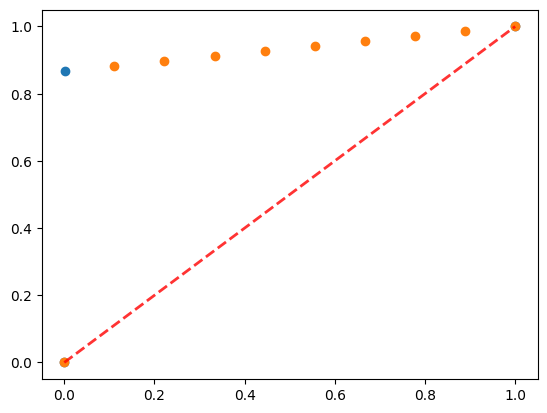

In [47]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plt.scatter(fpr, tpr)
mean_fpr = np.linspace(0, 1, 10)

ys = np.interp(mean_fpr, fpr, tpr)

print(f"fpr = {fpr}, \ntpr = {tpr},\nitp = {ys}")
plt.scatter(mean_fpr, ys)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.show()